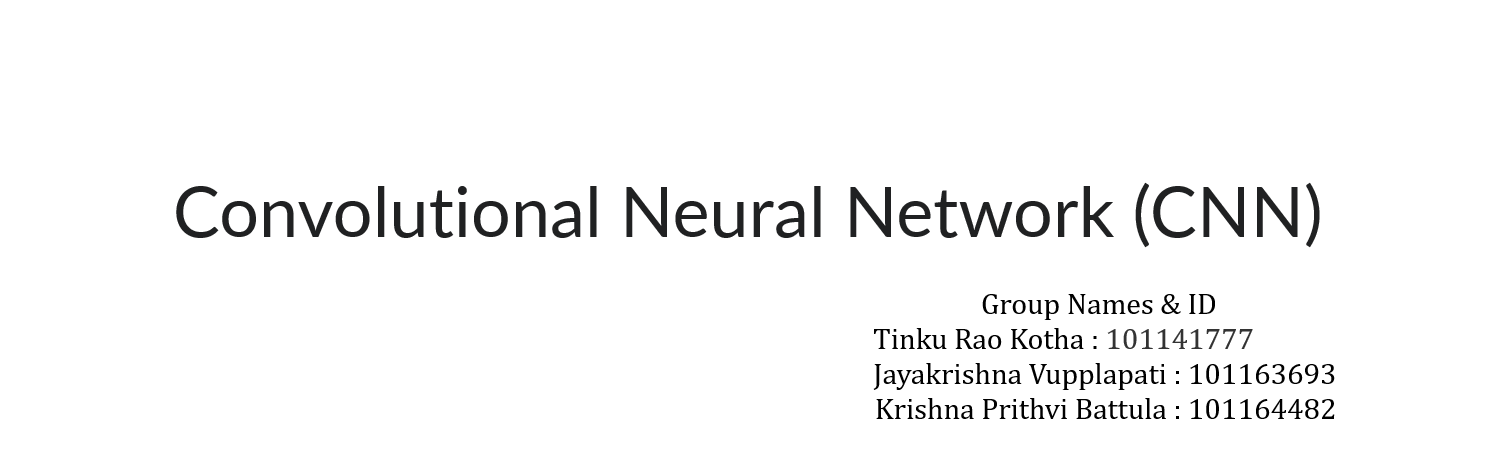

In [92]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [93]:
# Fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

In [94]:
# Extract features and targets from the DataFrame
X = optical_recognition_of_handwritten_digits.data.features.values
y = optical_recognition_of_handwritten_digits.data.targets.values


In [95]:
# Reshape X to match input shape for CNN (assuming the original format is (num_samples, num_features))
X = X.reshape(X.shape[0], 8, 8, 1).astype('float32')

In [96]:
# One-hot encode labels
y = np.eye(len(np.unique(y)))[y]
y = y.reshape(-1, 10)

In [97]:
# Define CNN architecture
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [98]:
# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [99]:
# Create model
model = create_model()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 2, 2, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 1, 128)         32896     
                                                                 
 flatten_6 (Flatten)         (None, 128)              

In [100]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
141/141 [==============================] - 5s 19ms/step - loss: 0.4805 - accuracy: 0.8590 - val_loss: 0.1646 - val_accuracy: 0.9466
Epoch 2/10
141/141 [==============================] - 2s 16ms/step - loss: 0.0998 - accuracy: 0.9706 - val_loss: 0.0691 - val_accuracy: 0.9769
Epoch 3/10
141/141 [==============================] - 2s 15ms/step - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0.0605 - val_accuracy: 0.9840
Epoch 4/10
141/141 [==============================] - 2s 16ms/step - loss: 0.0334 - accuracy: 0.9893 - val_loss: 0.0532 - val_accuracy: 0.9858
Epoch 5/10
141/141 [==============================] - 2s 15ms/step - loss: 0.0310 - accuracy: 0.9891 - val_loss: 0.0587 - val_accuracy: 0.9831
Epoch 6/10
141/141 [==============================] - 3s 20ms/step - loss: 0.0256 - accuracy: 0.9911 - val_loss: 0.0607 - val_accuracy: 0.9786
Epoch 7/10
141/141 [==============================] - 2s 18ms/step - loss: 0.0277 - accuracy: 0.9898 - val_loss: 0.0427 - val_accuracy: 0.9884

In [101]:
# Evaluate model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {scores[0]}, Test accuracy: {scores[1]}')

Test loss: 0.03194475546479225, Test accuracy: 0.9919928908348083


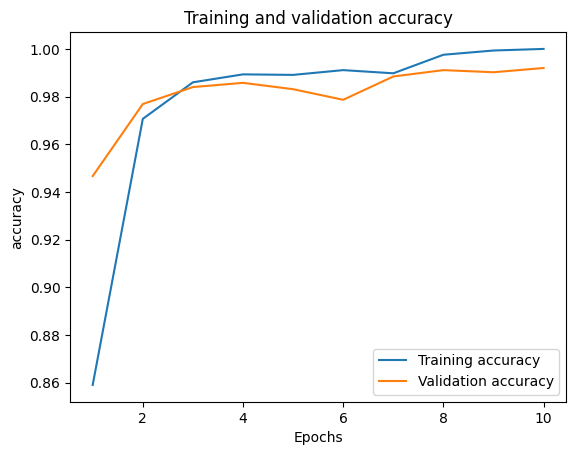

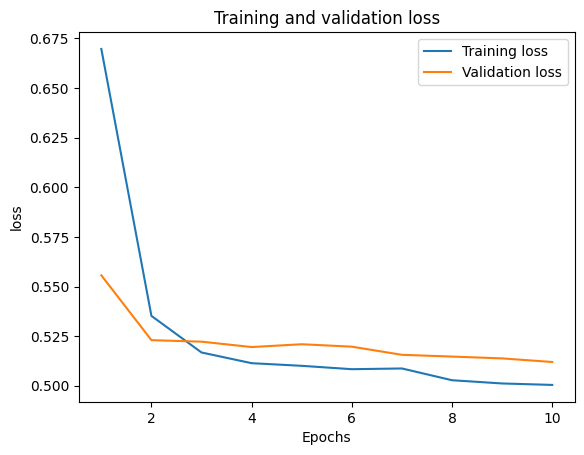

In [102]:
#Lists to store accuracy and loss for each epoch
all_train_acc = []
all_val_acc = []

def training_validation_plots(a, b):
  # Store accuracy for each epoch
  all_train_acc.append(history.history[a])
  all_val_acc.append(history.history[b])

  # Calculate mean accuracy for each epoch
  mean_train_acc = np.mean(all_train_acc, axis=0)
  mean_val_acc = np.mean(all_val_acc, axis=0)

  # Plot accuracy vs epochs
  epochs = range(1, len(mean_train_acc) + 1)
  plt.plot(epochs, mean_train_acc, label='Training '+a)
  plt.plot(epochs, mean_val_acc, label='Validation '+a)
  plt.title('Training and validation '+a)
  plt.xlabel('Epochs')
  plt.ylabel(a)
  plt.legend()
  plt.show()

training_validation_plots('accuracy', 'val_accuracy')
training_validation_plots('loss', 'val_loss')

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [104]:
# Lists to store true and predicted labels
true_labels = []
predicted_labels = []


In [105]:
# Predict on test set
y_pred = model.predict(X_test)

36/36 [==============================] - 0s 4ms/step


In [106]:
# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
true_labels.extend(np.argmax(y_test, axis=1))
predicted_labels.extend(y_pred_labels)


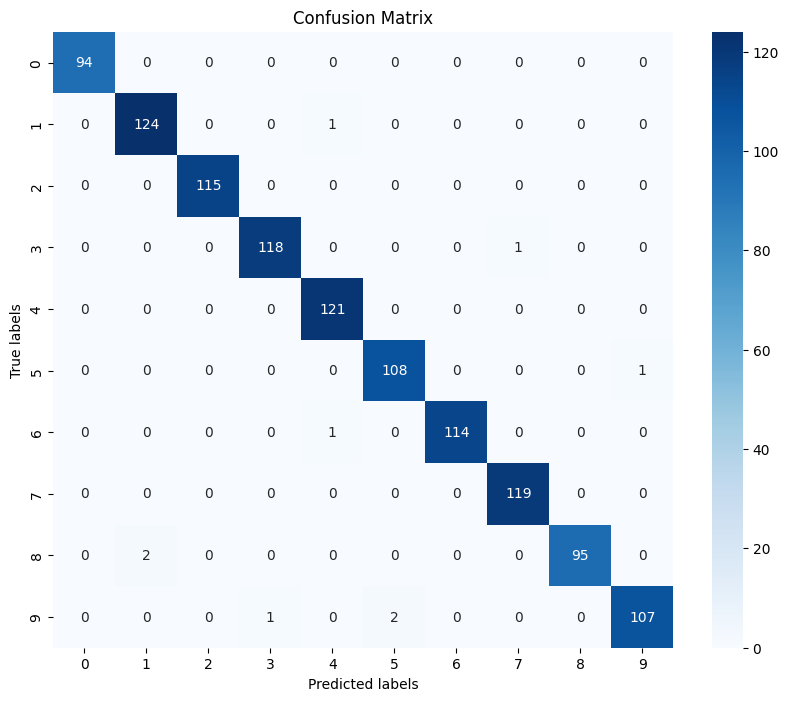

In [107]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [108]:
from graphviz import Digraph

# Create a new Digraph
dot = Digraph()

# Define nodes for each layer
layers = ['Input (8x8x1)', 'Conv2D (32 filters, 3x3)\nReLU', 'MaxPooling2D (1x1)',
          'Conv2D (64 filters, 3x3)\nReLU', 'MaxPooling2D (2x2)', 'Conv2D (128 filters, 2x2)\nReLU',
          'Flatten', 'Dense (128 units)\nReLU', 'Dense (10 units)\nSoftmax', 'Output (10 classes)']

for layer in layers:
    dot.node(layer)

# Define edges between layers
edges = [('Input (8x8x1)', 'Conv2D (32 filters, 3x3)\nReLU'),
         ('Conv2D (32 filters, 3x3)\nReLU', 'MaxPooling2D (1x1)'),
         ('MaxPooling2D (1x1)', 'Conv2D (64 filters, 3x3)\nReLU'),
         ('Conv2D (64 filters, 3x3)\nReLU', 'MaxPooling2D (2x2)'),
         ('MaxPooling2D (2x2)', 'Conv2D (128 filters, 2x2)\nReLU'),
         ('Conv2D (128 filters, 2x2)\nReLU', 'Flatten'),
         ('Flatten', 'Dense (128 units)\nReLU'),
         ('Dense (128 units)\nReLU', 'Dense (10 units)\nSoftmax'),
         ('Dense (10 units)\nSoftmax', 'Output (10 classes)')]

for edge in edges:
    dot.edge(edge[0], edge[1])

# Render the graph
dot.render('cnn_architecture', format='png', cleanup=False)

'cnn_architecture.png'

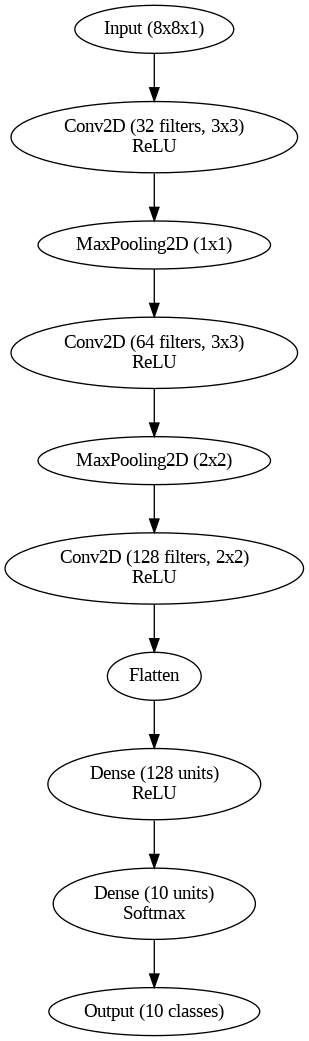

**Document the effect of max pooling on feature maps**.
Max pooling is a downsampling technique often employed in convolutional neural networks (CNNs) to minimize the spatial dimensions of feature maps while maintaining the most essential ones. This is the impact of max pooling on feature maps:

**Dimension Reduction:**
Max pooling reduces the spatial dimensions (width and height) of feature maps while keeping their depth.
Max pooling effectively summarizes local information by selecting the maximum value within each pooling window, collecting the region's most notable attributes.

**Translation Invariance:**
Max pooling achieves translational invariance, making the network less susceptible to minor input data changes.
Because max pooling only preserves the maximum value in each pooling region, minor input translations are likely to result in the same maximum values being selected after pooling.

**Reduced Computational Complexity:**
Max pooling minimizes network parameters and calculations by reducing the spatial dimensions of feature maps.
This reduction in complexity can help to reduce overfitting and increase training efficiency.

**Translation Invariance:**
Feature Localization: Max pooling diminishes spatial resolution but keeps features localized by keeping maximum value locations.
This localization is critical for preserving the spatial information required for accurate object detection and recognition.

**Enhancement of Robustness:**
Max pooling improves network tolerance to fluctuations and distortions in input data.
Max pooling improves the network's ability to generalize to new data and input variations by focusing on the most significant features in each zone.
Describe the process of flattening and connecting the
convolutional layers to the fully connected layer.

**Translation Invariance:**
In a convolutional neural network (CNN), the process of flattening and connecting the convolutional layers to the fully connected layer includes the following steps:

**Convolutional Layers (Conv2D):**
These layers use filters to detect features in the input data, applying element-wise multiplications and summations.

**Pooling Layers (MaxPooling2D):** After convolution, pooling layers downsample feature maps to keep just the most significant information while reducing spatial dimensions.

**Flattening:**
The generated feature maps are flattened into a one-dimensional vector, retaining the spatial structure of the data while changing it to a format appropriate for input into fully connected layers.

**Fully Connected Layers (Dense):**
These layers are made up of neurons that are connected to every neuron in the layer before them, resulting in a dense network. These layers process the flattened feature vector to learn high-level representations.
The output layer is normally made up of neurons equal to the number of classes in the classification task. It computes class probabilities with activation functions such as softmax and minimizes the training loss between predicted probabilities and true labels.



Document the training process, including loss curves and accuracy metrics.
To generate a CNN model, the Keras Sequential API is used. Convolutional layers are used first, followed by max-pooling layers, and finally completely connected layers.
The Adam optimizer, the categorical cross-entropy loss function, and the accuracy metric are used to build the model.
Fetch the dataset for handwritten digit recognition.
The dataset is analyzed for features and targets.
Features are reshaped to correspond to the CNN's input shape.
The target labels are encoded with one-hot.
To separate the dataset into training and testing sets, K-Fold cross-validation with 5 folds is used.
The model is trained using training data for 10 epochs with a batch size of 32.
During training and validation, parameters for loss and accuracy are tracked.
After training, the model is evaluated on test data to determine its loss and accuracy.
To further examine the model's performance, a confusion matrix and other assessment metrics can be generated.
Plotting loss curves and accuracy metrics helps understand the training process and model performance.
Plots are created for training and validation loss, as well as training and validation accuracy, over epochs.



 **Documentation And Analysis**

This project aims to create a Convolutional Neural Network (CNN) that performs digit classification for handwritten images based on the numerical data given in the K-fold cross-validation technique. The Convolution model has three layers of convolution with ReLU activation and max-pooling layers along with the three layers and one fully connected and final dense layers with softmax activation respectively. The preprocessed data is feed into the CNN model and the data is split into 5 folds using the K-fold cross-validation to validate the performance of the model by using some data as the training dataset and validation dataset.

The model is trained for 10 Epoch and Visualizations of training and validation accuracy and validation loss is ploted.
It is visible that the accuracy is increasing with every epoch and loss is decreasing which is an indication that the model is learning well.
The final Test accuracy is 97.60%.
Confusion matrix is also created and it is apparent that for most digit classes accurate classification is done but still Mislassification between digits that look similar to each other.
Overall this project shows that a CNN can be succsfully implemented to classify Hand written digits into given classe, and the model achieve a high accuracy with the help of K-fold cross-validation and visualisation techniques for analysing performance.